# Random Forest

In [1]:
from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating an object called iris with the iris data
iris = load_iris()

In [3]:
# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Add a new column for the species name
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Create Test and Train Data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [6]:
# Create dataframes with test rows and training rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

# show the number of observations for test and train dataframe
print('Training data:', len(train))
print('Testing data:', len(test))

Training data: 118
Testing data: 32


In [7]:
# Create a list of the feature column's names
features = df.columns[:4]

features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
# Converting each species name into digits
y = pd.factorize(train['species'])[0]

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

**Train Classifier**

In [9]:
# Creating a random forest classifier
clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# Training the classifier
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=-1, random_state=0)

**Test Classifier**

In [10]:
# Apply the trained Classifier to the test
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**View Probability**

In [11]:
# Viewing the predicted probabilities of the first 10 observation
clf.predict_proba(test[features])[10:20]

array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.67, 0.33],
       [0.  , 1.  , 0.  ],
       [0.  , 0.82, 0.18],
       [0.  , 0.03, 0.97],
       [0.  , 0.42, 0.58],
       [0.  , 0.99, 0.01],
       [0.  , 0.96, 0.04]])

In [12]:
# mapping names for the plants for each predicted plan class
preds = iris.target_names[clf.predict(test[features])]

preds[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [13]:
# Viewing the Actural species for the first five observation
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [14]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [15]:
# View accuracy score
accuracy_score(test['species'], preds)

0.9375

In [16]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(test['species'], preds)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix

array([[1.        , 0.        , 0.        ],
       [0.        , 0.71428571, 0.28571429],
       [0.        , 0.        , 1.        ]])

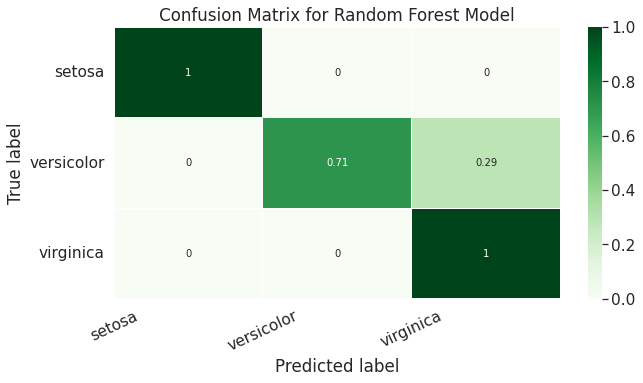

In [17]:
# Build the plot
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['setosa', 'versicolor', 'virginica']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

